In [15]:
!pip install scikit-image

Epoch 1/10


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


45/45 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.2833 - loss: 2.2161 - val_accuracy: 0.6194 - val_loss: 1.2434
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7710 - loss: 0.8356 - val_accuracy: 0.9111 - val_loss: 0.3441
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.8676 - loss: 0.4065 - val_accuracy: 0.9167 - val_loss: 0.2726
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9219 - loss: 0.2862 - val_accuracy: 0.9389 - val_loss: 0.2181
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9374 - loss: 0.2275 - val_accuracy: 0.9417 - val_loss: 0.1600
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9474 - loss: 0.1779 - val_accuracy: 0.9472 - val_loss: 0.1455
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9376 - loss: 0.1839 - val_accuracy: 0.9639 - val_loss: 0.1088
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9564 - loss: 0.1392 - val_accuracy: 0.9556 - val_loss: 0.

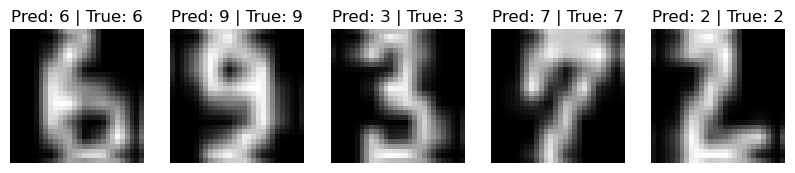

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from skimage.transform import resize

digits = load_digits()
X = digits.images 
y = digits.target 

X_resized = np.array([resize(img, (28, 28)) for img in X])

X = X_resized.reshape(-1, 28, 28, 1) / 255.0 
y = to_categorical(y, 10) 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),  
    keras.layers.MaxPooling2D((2,2)),  
    keras.layers.Conv2D(64, (3,3), activation='relu'),  
    keras.layers.MaxPooling2D((2,2)),  
    keras.layers.Flatten(),  
    keras.layers.Dense(128, activation='relu'),  
    keras.layers.Dense(10, activation='softmax')  # Output Layer (10 Classes: 0-9)
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), verbose=1)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

predictions = model.predict(X_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
actual_labels = np.argmax(y_test[:5], axis=1)

fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Pred: {predicted_labels[i]} | True: {actual_labels[i]}")
    ax.axis("off")

plt.show()